See:- https://www.geeksforgeeks.org/python-implementation-of-movie-recommender-system/

In [87]:
# import pandas library
import pandas as pd
 
# Get the data
 
path = 'https://raw.githubusercontent.com/TracyRenee61/AV-Recommendation-Engine/master/Things_to_do_weekend%20-%20Sheet1.csv'
 
df = pd.read_csv(path)
 
# Check the head of the data
df

,user_id,activity_id,thing_to_do,genre,rating
0,1,1,make beds,housework,3
1,1,2,mop floors,housework,3
2,1,3,vacuum,housework,4
3,1,4,clean toilet,housework,1
4,1,5,dust furniture,housework,4
...,...,...,...,...,...
298,3,97,read a book,outing,7
299,3,98,write a book,work,3
300,3,99,write a blog post,work,3
301,3,100,work a part time job,work,3


In [88]:
#remove white space
df.columns = df.columns.str.replace(' ', '')

In [89]:
#add column count ratings

df['rate_count'] = df['user_id'].groupby(df['activity_id']).transform('count')
df['rate_count'] = df['rate_count'].astype(float)
df

,user_id,activity_id,thing_to_do,genre,rating,rate_count
0,1,1,make beds,housework,3,3.0
1,1,2,mop floors,housework,3,3.0
2,1,3,vacuum,housework,4,3.0
3,1,4,clean toilet,housework,1,3.0
4,1,5,dust furniture,housework,4,3.0
...,...,...,...,...,...,...
298,3,97,read a book,outing,7,3.0
299,3,98,write a book,work,3,3.0
300,3,99,write a blog post,work,3,3.0
301,3,100,work a part time job,work,3,3.0


In [90]:
#average ratings

df['average_rating'] = df['rating'].groupby(df['thing_to_do']).transform('sum')/df['rate_count']
df

,user_id,activity_id,thing_to_do,genre,rating,rate_count,average_rating
0,1,1,make beds,housework,3,3.0,3.333333
1,1,2,mop floors,housework,3,3.0,2.666667
2,1,3,vacuum,housework,4,3.0,3.333333
3,1,4,clean toilet,housework,1,3.0,1.666667
4,1,5,dust furniture,housework,4,3.0,3.333333
...,...,...,...,...,...,...,...
298,3,97,read a book,outing,7,3.0,7.666667
299,3,98,write a book,work,3,3.0,5.000000
300,3,99,write a blog post,work,3,3.0,4.666667
301,3,100,work a part time job,work,3,3.0,3.333333


In [91]:
#calculate average
# Calculate mean of rating average column
C = df['average_rating'].mean()
print(C)

6.026402640264028


In [92]:
# Calculate the minimum number of ratings required to be in the chart, m
m = df['rate_count'].quantile(0.90)
print(m)

3.0


In [93]:
#calculate weighted average
v = df['rate_count']
R = df['average_rating']
df['score'] = (v/(v+m) * R) + (m/(m+v) * C)
df

,user_id,activity_id,thing_to_do,genre,rating,rate_count,average_rating,score
0,1,1,make beds,housework,3,3.0,3.333333,4.679868
1,1,2,mop floors,housework,3,3.0,2.666667,4.346535
2,1,3,vacuum,housework,4,3.0,3.333333,4.679868
3,1,4,clean toilet,housework,1,3.0,1.666667,3.846535
4,1,5,dust furniture,housework,4,3.0,3.333333,4.679868
...,...,...,...,...,...,...,...,...
298,3,97,read a book,outing,7,3.0,7.666667,6.846535
299,3,98,write a book,work,3,3.0,5.000000,5.513201
300,3,99,write a blog post,work,3,3.0,4.666667,5.346535
301,3,100,work a part time job,work,3,3.0,3.333333,4.679868


In [94]:
# Calculate mean rating of all movies
df.groupby('thing_to_do')['rating'].mean().sort_values(ascending=False)


thing_to_do
retire from work        9.000000
go to london            8.666667
go to isle of wight     8.666667
go to hollywood         8.666667
go to bournemouth       8.333333
                          ...   
clean floorboards       2.333333
clean sideboards        2.000000
clean oven              2.000000
clean toilet            1.666667
clean mold off walls    1.666667
Name: rating, Length: 101, dtype: float64

In [95]:
# Calculate count rating of all movies
df.groupby('thing_to_do')['rating'].count().sort_values(ascending=False)


thing_to_do
write a book                 3
go to burger king            3
go rollar skating            3
go scuba diving              3
go shopping                  3
                            ..
make fruitcake               3
make spaghetti bolenaise     3
make strawberry shortcake    3
make sushi                   3
bake a cake                  3
Name: rating, Length: 101, dtype: int64

In [96]:
# creating dataframe with 'rating' count values
ratings = pd.DataFrame(df.groupby('thing_to_do')['rating'].mean())
ratings['num_ratings'] = pd.DataFrame(df.groupby('thing_to_do')['rating'].count())
ratings

,rating,num_ratings
thing_to_do,,
bake a cake,4.333333,3
clean floorboards,2.333333,3
clean mold off walls,1.666667,3
clean oven,2.000000,3
clean sideboards,2.000000,3
...,...,...
watch a youtube video,6.666667,3
watch an american football game,4.666667,3
work a part time job,3.333333,3


In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

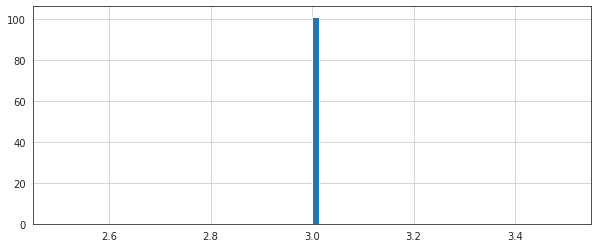

In [98]:
# plot graph of 'num of ratings column'
plt.figure(figsize =(10, 4))
 
ratings['num_ratings'].hist(bins = 70)

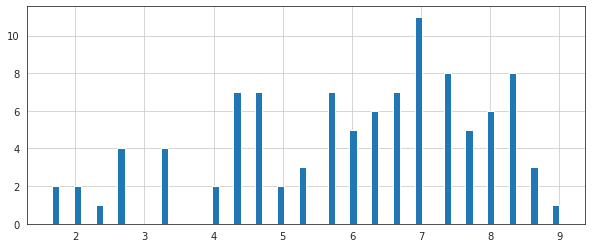

In [99]:
# plot graph of 'ratings' column
plt.figure(figsize =(10, 4))
ratings['rating'].hist(bins = 70)


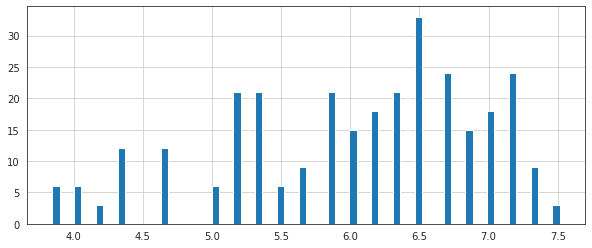

In [100]:
# plot graph of 'score' column
plt.figure(figsize =(10, 4))
df['score'].hist(bins = 70)

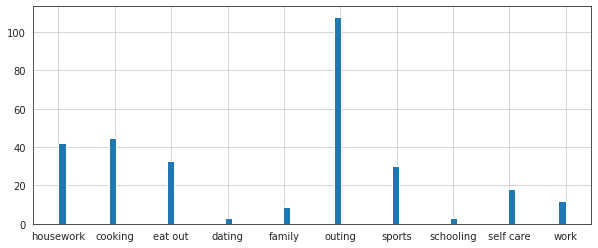

In [101]:
# plot graph of 'score' column
plt.figure(figsize =(10, 4))
df['genre'].hist(bins = 70)


In [102]:
# Sorting values according to
# the 'num of rating column'
activity_mat = df.pivot_table(index ='user_id',columns ='thing_to_do', values ='rating')
print(activity_mat)

thing_to_do  bake a cake  clean floorboards  ...  write a blog post  write a book
user_id                                      ...                                 
1                      6                  2  ...                  8             8
2                      3                  1  ...                  3             4
3                      4                  4  ...                  3             3

[3 rows x 101 columns]


In [103]:
ratings.sort_values('num_ratings', ascending = False).head(10)

,rating,num_ratings
thing_to_do,,
bake a cake,4.333333,3
make beds,3.333333,3
make tiramasu,5.333333,3
make tempura,4.666667,3
make sushi,4.666667,3
make strawberry shortcake,6.000000,3
make spaghetti bolenaise,5.000000,3
make fruitcake,4.333333,3
make chocolate cake,5.666667,3


In [104]:
# analysing correlation with similar movies
cake_user_ratings = activity_mat['make carrot cake']
clean_user_ratings = activity_mat['make beds']
cake_user_ratings


user_id
1    8
2    6
3    4
Name: make carrot cake, dtype: int64

In [105]:
# analysing correlation with similar movies
similar_to_cake = activity_mat.corrwith(cake_user_ratings)
similar_to_clean = activity_mat.corrwith(clean_user_ratings)
 
corr_cake = pd.DataFrame(similar_to_cake, columns =['Correlation'])
corr_cake.dropna(inplace = True)
 
corr_cake.head()


,Correlation
thing_to_do,
bake a cake,0.654654
clean floorboards,-0.654654
clean mold off walls,-0.866025
clean oven,-0.500000
clean sideboards,-0.500000


In [106]:
# Similar movies like starwars
corr_cake.sort_values('Correlation', ascending = False).head(10)
corr_cake = corr_cake.join(ratings['num_ratings'])
 
corr_cake.head()
 
corr_cake[corr_cake['num_ratings']>2].sort_values('Correlation', ascending = False).head()


,Correlation,num_ratings
thing_to_do,,
make carrot cake,1.000000,3
make strawberry shortcake,1.000000,3
go to wendys,1.000000,3
go to japanese restaurant,0.981981,3
see stepchildren,0.981981,3


In [107]:
# Similar movies as of liarliar
corr_clean = pd.DataFrame(similar_to_clean, columns =['Correlation'])
corr_clean.dropna(inplace = True)
 
corr_clean = corr_clean.join(ratings['num_ratings'])
corr_clean[corr_clean['num_ratings']>2].sort_values('Correlation', ascending = False).head()


,Correlation,num_ratings
thing_to_do,,
go to the movies,1.0,3
clean windows,1.0,3
make beds,1.0,3
go to art gallery,1.0,3
go to a wildlife park,1.0,3
